In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

In [4]:
MERGED_ROOT  = Path("/media/sameerhashmi/ran_epav_disk/Sameer_dataset_from_smb/merged_dataset")
MASTER_NAMES = Path("/media/sameerhashmi/ran_epav_disk/Sameer_dataset_from_smb/script/master.names")
SPLITS       = ["train", "val"]

In [5]:
# 1) Load class names
with MASTER_NAMES.open("r") as f:
    names = [line.strip() for line in f if line.strip()]
nc = len(names)

In [6]:
# 2) Initialize counts
class_counts = [0] * nc
image_counts = {}

In [7]:
# 3) Count annotations per class with tqdm
for split in SPLITS:
    lbl_dir = MERGED_ROOT / "labels" / split
    for lbl_file in tqdm(list(lbl_dir.glob("*.txt")), desc=f"Counting {split} labels", unit="file"):
        for line in lbl_file.read_text().splitlines():
            if not line: 
                continue
            idx = int(line.split()[0])
            class_counts[idx] += 1

Counting val labels: 100%|██████████| 106309/106309 [00:41<00:00, 2565.24file/s]


In [8]:
# 4) Count images per split with tqdm
for split in SPLITS:
    img_dir = MERGED_ROOT / "images" / split
    count = 0
    for _ in tqdm(list(img_dir.iterdir()), desc=f"Counting {split} images", unit="img"):
        if _.is_file():
            count += 1
    image_counts[split] = count

Counting val images: 100%|██████████| 106309/106309 [00:01<00:00, 85352.82img/s]


In [9]:
# 5) Summaries
total_images      = sum(image_counts.values())
total_label_files = sum(image_counts.values())  # one label per image
total_annotations = sum(class_counts)


In [10]:
# 6) Build DataFrame and print
df = pd.DataFrame({"class": names, "count": class_counts})
df_sorted = df.sort_values("count", ascending=False).reset_index(drop=True)


In [11]:
print("\n=== Dataset Summary ===")
print(f"Total images        : {total_images}")
print(f"Total label files   : {total_label_files}")
print(f"Total annotations   : {total_annotations}\n")


=== Dataset Summary ===
Total images        : 2382423
Total label files   : 2382423
Total annotations   : 31810705



In [15]:
print("=== Images per split ===")
for split in SPLITS:
    print(f"  {split}: {image_counts[split]}")

print("\n=== Top 10 Classes by Annotation Count ===")
print(df_sorted.head(40).to_string(index=False))

=== Images per split ===
  train: 2276114
  val: 106309

=== Top 10 Classes by Annotation Count ===
          class   count
         person 7882936
       sneakers 1250252
          chair 1104610
            car 1053052
    other_shoes  929993
            hat  868361
           lamp  713343
        glasses  685858
         bottle  683150
            cup  565796
           desk  562292
  street_lights  543888
  cabinet_shelf  455442
handbag_satchel  448306
       bracelet  399973
       clothing  357397
           book  328880
          plate  322499
         helmet  319327
  picture_frame  313745
    storage_box  296784
         gloves  294693
          wheel  286214
           boat  267258
         flower  234178
          bench  222812
  leather_shoes  221924
   potted_plant  213927
     bowl_basin  192083
           flag  190628
     microphone  180484
       necklace  165394
           vase  165178
         pillow  164421
       footwear  161874
           ring  161672
          bo

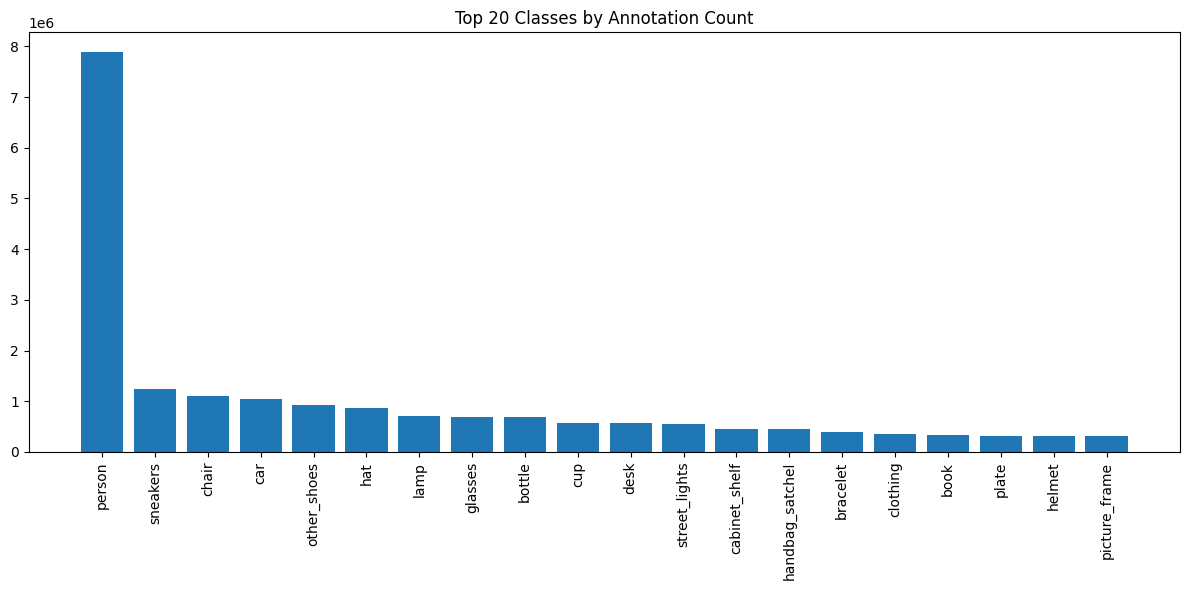

In [13]:
# 7) Plot Top-20 bar chart
plt.figure(figsize=(12,6))
plt.bar(df_sorted["class"][:20], df_sorted["count"][:20])
plt.xticks(rotation=90)
plt.title("Top 20 Classes by Annotation Count")
plt.tight_layout()
plt.show()

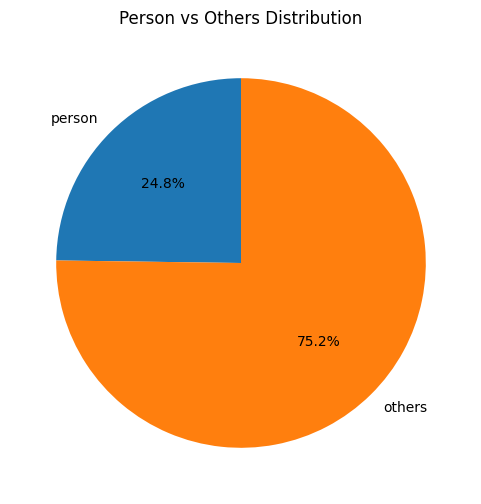

In [14]:
# 8) Plot Person vs Others pie
person_idx = names.index("person") if "person" in names else None
person_count = class_counts[person_idx] if person_idx is not None else 0
others_count = total_annotations - person_count
plt.figure(figsize=(6,6))
plt.pie(
    [person_count, others_count],
    labels=["person", "others"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Person vs Others Distribution")
plt.show()